# Project: Exploratory Data Analysis on Medical appointment dataset
`
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd

<a id='intro'></a>
## Introduction

In this project, i will be investigating a dataset about Medical Appointments in Brazil. The dataset contains personal details about patients, some of their medical conditions and whether they showed up for their appointment or not. The goal of this project is to discover insights as to the factors that could affect patients likelhood of showing up for an appointment. Questions i will be looking to answer with my analysis are:
1. Which Sex is more likely to showup for an Appointment ?
2. Do these conditions : alcohoilism, Diabetes and hypertension affect a patients, show up rate ?
3. Are people who received SMS more likely to show up for their appointment ?
4. Are the people enrolled in Brasilian welfare program more likely to show up for an appointment ?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#load and preview dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling
in this section of my project, i uploaded and loaded the data set, previewed the contents, checked to see if the data is clean for data analysis and performed data wrangling where necessary.

### General Properties

In [3]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#preview dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I loaded the data into my workspace using a pandas method - pd.read_csv(), i then proceeded to see a preview of the dataset using a pandas method df.head().
Below are my findings.

<h1>Description of datasets (columns) </h1>
<ul>
<li> Patientid : This is the identification number of each patient. </li>
<li> AppointmenId : This the no used to identify an appointment made.</li>
<li> Gender : The sex of the patient M-male, F-female.</li>
<li>ScheduledDay : The date and time the appointment was made.</li>
<li>AppointmentDay :The date of the appointment.</li>
<li>Age : How old the patient is.</li>
<li>Neighbourhood : Hospital location.</li>
<li>Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família</a>.</li>
<li>Hipertension : indicates if the patient is hypersensitive or not.</li>
<li>Diabetes : indicates if the patient is diabetic or not.</li>
<li>Alcoholism : indicates if the patient is an alchoholic.</li>
<li> Handcap : is the patient handicaped.</li>
<li>SMS_received : did the patient get a reminder SMS on his/her appointment day.</li>
<li>No-show : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

In [4]:
#check number of rows and columns in  dataset
df.shape

(110527, 14)

I used the method DataFrame.shape to find out how many rows and columns are in my dataset.
110527 data entries and 14 feature columns


In [5]:
#check dataset data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I found the out there where no missing values in my dataset and the datatype in each column using df.info

In [4]:
#check for duplicates
sum(df.duplicated())

0

There are no duplicated rows in my data set. i got that from the code above.

In [5]:
#check for distinct values in each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
#check unique values in each column
print("Age : {}".format(df['Age'].unique()))
print("Diabetes : {}".format(df['Diabetes'].unique()))
print("SMS : {}".format(df['SMS_received'].unique()))
print("Handicap : {}".format(df['Handcap'].unique()))
print("Alcoholism : {}".format(df['Alcoholism'].unique()))
print("No-Show : {}".format(df['No-show'].unique()))
print("Hypertension: {}".format(df['Hipertension'].unique()))

Age : [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Diabetes : [0 1]
SMS : [0 1]
Handicap : [0 1 2 3 4]
Alcoholism : [0 1]
No-Show : ['No' 'Yes']
Hypertension: [1 0]


In [9]:
#perform descriptive analysis on data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<h1>Observations</h1>
<ul>
    <li> Two columns have wrong spellings (Hipertension and Handcap). </li>
    <li> The first two colums both have Id in them, but one starts with a lowercase. </li>
    <li>Scholarship,Hipertension,Diabetes,Alcoholism and SMS_received columns all have only 2 values 1 for (yes) True and 0 for false (no). </li>
    <li> Handcap column has five values [0,1,2,3,4].</li>
    <li> There is an entry of -1 and 0 in the 'Age' column </li>
    <li>The datatypes for 'Patientid', 'ScheduledDay' and 'AppointmentDay' are not appropriate</li>
</ul>



### Data Cleaning
Below is a list of what i did in this section:
1. Changed the names of columns that were misspelt.
2. Changed the data type for 'Patientid' from float to integer.
3. Changed the data type for 'ScheduledDay' and 'Appointment' day from string to Datetime.
4. Confirmed if there are more than 1 occurrence of -1 and 0 in the age columns.

In [4]:
# Rename columns
df.rename(columns={'PatientId':'PatientId','AppointmentID':'AppointmentId', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap'},inplace =True)
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#change data type of Patient Id
df['PatientId'] = df['PatientId'].astype(int)
df.PatientId.head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64

In [6]:
#change data type of ScheduledDay to datatime object
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#change data type of AppointmentDay to datatime object
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.loc[df['Age'] == 0].count()['Age']

3539

* Age = -1 occurs only once so maybe it was a mistake, and Age = 0 occurs 3539 times so i think it is an intentional data entry. age = -1 is not a valid number so i would drop this row.

In [9]:
#dealing with -1 value and 0 in age column
df.loc[df['Age'] == -1].count()['Age']

1

In [10]:
df.loc[df['Age']==-1]
df.drop(index=99832,inplace=True)

Dropped the row with 'Age' = -1

<a id='eda'></a>
## Exploratory Data Analysis
In this section, after performing data wrangling, i'll be using descriptive statistics and creating visualizations with the goal of addressing the research questions that i posed in the Introduction section.


### 1. Research Question 1 : Which Sex is more likely to showup for an Appointment ?

In [15]:
#count number of male and females
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [16]:
# store the count in variables
total_female = 71839
total_male = 38687

In [17]:
#finding count of females & males who showed up
df.groupby(['Gender','No-show']).count()


PatientId  AppointmentId  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           57245          57245         57245           57245  57245   
       Yes          14594          14594         14594           14594  14594   
M      No           30962          30962         30962           30962  30962   
       Yes           7725           7725          7725            7725   7725   

                Neighbourhood  Scholarship  Hypertension  Diabetes  \
Gender No-show                                                       
F      No               57245        57245         57245     57245   
       Yes              14594        14594         14594     14594   
M      No               30962        30962         30962     30962   
       Yes               7725         7725          7725      7725   

                Alcoholism  Handicap  SMS_received  
Gender No-show                                      
F      No            57245     57245         57245  
       Yes           14594     14594         14594  
M      No            30962     30962         30962  
       Yes            7725      7725          7725

In [18]:
#proportion of females who showed up
female_who_showed = 57245
proportion_of_female_showed_up = float(female_who_showed) / float(total_female)
proportion_of_female_showed_up

0.7968512924734475

In [19]:
#find the count of males who showed up
male_who_showed = 30962
#proportion of female who showed up
proportion_of_male_showed_up = float(male_who_showed) / float(total_male)
proportion_of_male_showed_up

0.8003205211052808

A bar chart visualizing the proportion of Males and females who showed up

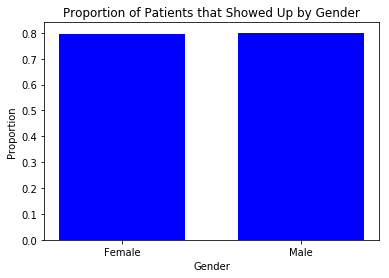

In [40]:
#plotting the barchart
plt.bar([1, 2],[proportion_of_female_showed_up, proportion_of_male_showed_up],width=0.7, color = ['blue'])
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Female', 'Male'])
plt.title('Proportion of Patients that Showed Up by Gender');


From the plot, you can see both genders are likely to show up for their appointments and it is safe to say that there is no correlation between Gender and show up rate.

### 2. Research Question 2  : Do these conditions, alcohoilism, Diabetes, hypertension affect a patients, show up rate ?

<h5>2.1 Are people with alchoholism more likely to show up vs people without ?</h3>

In [32]:
# count of people with and without alcoholism
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [48]:
# set values of people with and without alcoholism
alcoholism = 3360
no_alcoholism = 107166

In [33]:
# count of people with and without alcoholism who showedup
df.groupby(['Alcoholism','No-show']).count()

PatientId  AppointmentId  Gender  ScheduledDay  \
Alcoholism No-show                                                   
0          No           85524          85524   85524         85524   
           Yes          21642          21642   21642         21642   
1          No            2683           2683    2683          2683   
           Yes            677            677     677           677   

                    AppointmentDay    Age  Neighbourhood  Scholarship  \
Alcoholism No-show                                                      
0          No                85524  85524          85524        85524   
           Yes               21642  21642          21642        21642   
1          No                 2683   2683           2683         2683   
           Yes                 677    677            677          677   

                    Hypertension  Diabetes  Handicap  SMS_received  
Alcoholism No-show                                                  
0          No              85524     85524     85524         85524  
           Yes             21642     21642     21642         21642  
1          No               2683      2683      2683          2683  
           Yes               677       677       677           677

In [49]:
#proportion of people with alcoholism who showed up
proportion_alcoholism = float(2683)/float(alcoholism)
proportion_alcoholism

0.7985119047619048

In [50]:
#proportion of people without alcoholism who showed up
proportion_no_alcoholism = float(85524)/float(no_alcoholism)
proportion_no_alcoholism

0.7980516208498964

A bar chart visualizing the proportion of people with or without alcoholism who showed up

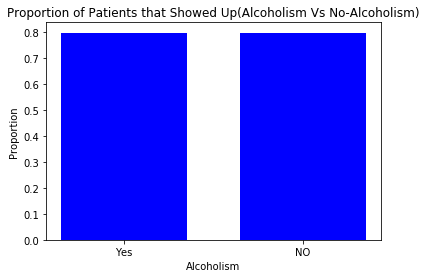

In [51]:
#plotting the barchart
plt.bar([1, 2],[proportion_alcoholism, proportion_no_alcoholism],width=0.7, color = ['blue'])
plt.xlabel('Alcoholism')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Yes', 'NO'])
plt.title('Proportion of Patients that Showed Up(Alcoholism Vs No-Alcoholism)');


From the plot, you can see both Alcoholics and Non-Alcoholics are likely to show up for their appointments and it is safe to say that there is no correlation between Alcoholism and show up rate.

<h5>2.2 Are people with Diabetes more likely to show up vs people without ?</h3>

In [52]:
# count of people with and without diabetes
df['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [53]:
# set values of people with and without diabetes
diabetes = 7943
no_diabetes = 102583

In [54]:
# count of people with and without diabetes who showedup
df.groupby(['Diabetes','No-show']).count()

PatientId  AppointmentId  Gender  ScheduledDay  \
Diabetes No-show                                                   
0        No           81694          81694   81694         81694   
         Yes          20889          20889   20889         20889   
1        No            6513           6513    6513          6513   
         Yes           1430           1430    1430          1430   

                  AppointmentDay    Age  Neighbourhood  Scholarship  \
Diabetes No-show                                                      
0        No                81694  81694          81694        81694   
         Yes               20889  20889          20889        20889   
1        No                 6513   6513           6513         6513   
         Yes                1430   1430           1430         1430   

                  Hypertension  Alcoholism  Handicap  SMS_received  
Diabetes No-show                                                    
0        No              81694       81694     81694         81694  
         Yes             20889       20889     20889         20889  
1        No               6513        6513      6513          6513  
         Yes              1430        1430      1430          1430

In [55]:
#proportion of people with diabetes who showed up
proportion_diabetes = float(6513)/float(diabetes)
proportion_diabetes

0.8199672667757774

In [56]:
#proportion of people without diabetes who showed up
proportion_no_diabetes = float(81694)/float(no_diabetes)
proportion_no_diabetes

0.7963697688700857

A bar chart visualizing the proportion of people with or without Diabetes who showed up

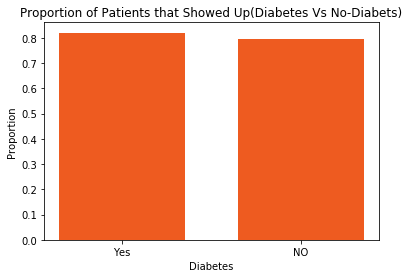

In [58]:
#plotting the barchart
plt.bar([1, 2],[proportion_diabetes, proportion_no_diabetes],width=0.7, color = ['#ee5b20'])
plt.xlabel('Diabetes')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Yes', 'NO'])
plt.title('Proportion of Patients that Showed Up(Diabetes Vs No-Diabets)');

From the plot we can see that people with diabetes are more likely to show up for their appointments.

<h5>2.1 Are people with Hypertension more likely to show up vs people without ?</h3>

In [59]:
# count of people with and without hypertension
df['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

In [60]:
# set values of people with and without hypertension
hypertension = 21801
no_hypertension = 88725

In [61]:
# count of people with and without hypertension who showedup
df.groupby(['Hypertension','No-show']).count()

PatientId  AppointmentId  Gender  ScheduledDay  \
Hypertension No-show                                                   
0            No           70178          70178   70178         70178   
             Yes          18547          18547   18547         18547   
1            No           18029          18029   18029         18029   
             Yes           3772           3772    3772          3772   

                      AppointmentDay    Age  Neighbourhood  Scholarship  \
Hypertension No-show                                                      
0            No                70178  70178          70178        70178   
             Yes               18547  18547          18547        18547   
1            No                18029  18029          18029        18029   
             Yes                3772   3772           3772         3772   

                      Diabetes  Alcoholism  Handicap  SMS_received  
Hypertension No-show                                                
0            No          70178       70178     70178         70178  
             Yes         18547       18547     18547         18547  
1            No          18029       18029     18029         18029  
             Yes          3772        3772      3772          3772

In [62]:
#proportion of people with hypertension who showed up
proportion_hypertension = float(18029)/float(hypertension)
proportion_hypertension

0.8269804137424889

In [63]:
#proportion of people without hypertension who showed up
proportion_no_hypertension = float(70178)/float(no_hypertension)
proportion_no_hypertension

0.7909608340377571

A bar chart visualizing the proportion of people with or without Hypertension who showed up

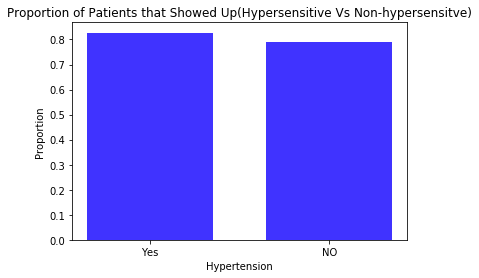

In [66]:
#plotting the barchart
plt.bar([1, 2],[proportion_hypertension, proportion_no_hypertension],width=0.7, color = ['#4033FF'])
plt.xlabel('Hypertension')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Yes', 'NO'])
plt.title('Proportion of Patients that Showed Up(Hypersensitive Vs Non-hypersensitve)');

From the plot we can see that people with Hypertension are more likely to show up for their appointments.

### 3. Research Question 3 : Are people who received SMS more likely to show up for their appointment ?

In [27]:
df.groupby(['SMS_received','No-show']).count()

PatientId  AppointmentId  Gender  ScheduledDay  \
SMS_received No-show                                                   
0            No           62509          62509   62509         62509   
             Yes          12535          12535   12535         12535   
1            No           25698          25698   25698         25698   
             Yes           9784           9784    9784          9784   

                      AppointmentDay    Age  Neighbourhood  Scholarship  \
SMS_received No-show                                                      
0            No                62509  62509          62509        62509   
             Yes               12535  12535          12535        12535   
1            No                25698  25698          25698        25698   
             Yes                9784   9784           9784         9784   

                      Hypertension  Diabetes  Alcoholism  Handicap  
SMS_received No-show                                                
0            No              62509     62509       62509     62509  
             Yes             12535     12535       12535     12535  
1            No              25698     25698       25698     25698  
             Yes              9784      9784        9784      9784

In [28]:
#total number of people who received SMS
sms_yes = 35482
#proportion of people who received sms and showed up
proportion_sms_yes = float(25698)/float(sms_yes)
proportion_sms_yes

0.7242545516036301

In [29]:
#total number of people who did not receive SMS
sms_no = 75044
#proportion of people who did not receive sms and showed up
proportion_sms_no = float(62509)/float(sms_no)
proportion_sms_no

0.8329646607323703

A bar chart visualizing the proportion of  people who showed up, with or without receiving and SMS


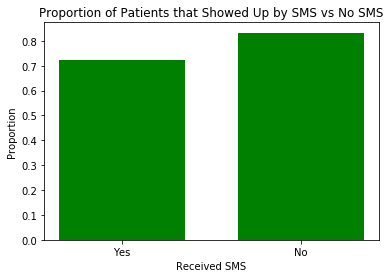

In [32]:
#plotting the barchart
plt.bar([1, 2],[proportion_sms_yes,proportion_sms_no],width=0.7, color = ['green'])
plt.xlabel('Received SMS')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Yes', 'No'])
plt.title('Proportion of Patients that Showed Up by SMS vs No SMS');


It appears that for some reason not clear to me, people who did not receive SMS are more likely to show up for their appointment than people who did.

### 4. Research Question 4 :  Are the people enrolled in Brasilian welfare program more likely to show up for an appointment ?

In [33]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [34]:
df.groupby(['Scholarship','No-show']).count()

PatientId  AppointmentId  Gender  ScheduledDay  \
Scholarship No-show                                                   
0           No           79924          79924   79924         79924   
            Yes          19741          19741   19741         19741   
1           No            8283           8283    8283          8283   
            Yes           2578           2578    2578          2578   

                     AppointmentDay    Age  Neighbourhood  Hypertension  \
Scholarship No-show                                                       
0           No                79924  79924          79924         79924   
            Yes               19741  19741          19741         19741   
1           No                 8283   8283           8283          8283   
            Yes                2578   2578           2578          2578   

                     Diabetes  Alcoholism  Handicap  SMS_received  
Scholarship No-show                                                
0           No          79924       79924     79924         79924  
            Yes         19741       19741     19741         19741  
1           No           8283        8283      8283          8283  
            Yes          2578        2578      2578          2578

In [37]:
# total number of people with sholarship 
yes_scholarship = 10861
# proportion of people with sholarship who showed up
proportion_scholarship_yes = float(8283)/float(yes_scholarship)
proportion_scholarship_yes

0.7626369579228433

In [38]:
# total number of people without sholarship 
no_scholarship = 99665
# proportion of people without sholarship who showed up
proportion_scholarship_no = float(79924)/float(no_scholarship)
proportion_scholarship_no

0.8019264536196258

A bar chart visualizing the proportion of  people enrolled in the scholarship program and those not enrolled, who showed up.


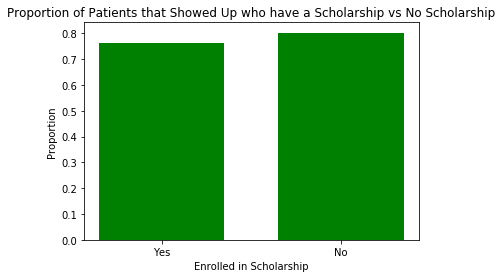

In [39]:
#plotting the barchart
plt.bar([1, 2],[proportion_scholarship_yes,proportion_scholarship_no],width=0.7, color = ['green'])
plt.xlabel('Enrolled in Scholarship')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Yes', 'No'])
plt.title('Proportion of Patients that Showed Up who have a Scholarship vs No Scholarship');


From the plot, you can see that people who are not enrolled in a scholarhip are more likely to show up for an appointment than those who are enrolled.

<a id='conclusions'></a>
## Conclusions
After performing Exploratory data analysis on the dataset, i found out the following :
1. There is almost no correlation between Gender and show up rates.
2. For some reason i can not explain, people not enrolled in a scholarship are more likely to show up for an appointment than people who have one.
3. Also people who received a reminder SMS on the average are less likely to show up for an appointment than people who received no SMS at all.
4. The following conditions : hypertension, alcoholism, and Diabetes have an effect on the likely hood a patient will show up for an appointment or not.

In [17]:
#build my model

In [18]:
df.shape

(110526, 14)

In [19]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df.columns

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
X = df[['Gender','Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']]

In [12]:
df.rename(columns={'No-show':'Label'},inplace=True)

In [18]:
Y.value_counts()

0    88207
1    22319
Name: Label, dtype: int64

In [13]:

df.Label = df.Label.str.replace('No','0')

In [14]:
df.Label = df.Label.str.replace('Yes','1')

In [15]:
df.Label = df.Label.astype(int)

In [53]:
df.Label.dtype

dtype('int64')

In [17]:
Y = df.Label

In [19]:
# One-hot encode the data using pandas get_dummiees
X = pd.get_dummies(X,columns=['Gender','Neighbourhood'])

In [20]:
X.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


0    No
1    No
2    No
3    No
4    No
Name: No-show, dtype: object

In [42]:
X.shape

(110526, 90)

In [65]:
# splt data

In [45]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, Y_train, X_labels, Y_labels = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [46]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()

In [40]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
Y_train.count()

77368

In [53]:
rf.fit(X_train,X_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
predictions = rf.predict(Y_train)

In [56]:
accuracy_score(predictions,Y_labels)

0.7566499788889559

In [57]:
f1_score(Y_labels,predictions)

0.21070135967915485

In [27]:
scoring = ['accuracy', 'precision', 'recall' , 'f1_score', 'roc_auc']

In [50]:
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(rf,X_train, X_labels,
                         scoring="roc_auc", cv=10)

In [60]:
scores.mean()

0.5744669383361973

In [61]:
recall_score(Y_labels,predictions)

0.1632312822067293

In [62]:
precision_score(Y_labels,predictions)

0.29710344827586205

In [ ]:
roc_auc_score()

In [ ]:
#grid search

In [65]:
#random search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:
## Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [69]:
rf_random

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [73]:
rf_random.fit(X_train,X_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 1.3min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 1.4min
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, 

KeyboardInterrupt: 